Import the modules that will be used.

In [101]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. When performing dot product between 2 vectors of length $n$, you perform $n$ multiplications and $n-1$ additions and both of these operations have a complexity of $O(n)$ and thus the overall complexity of the problem will be $O(n)$
2. When performing matrix-vector product you will perform $n$ additions $n$ times thus giving us a time complexity of $O(n^2)$
3. Matrix-Matix product is the same as performing the matrix vector product n consuctive times and thus will have time complexity of $O(n^3)$

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [102]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

In [125]:
import numpy as np
import matplotlib.pyplot as plt

number = 100

ns = np.linspace(0,number,number+1)
times = []

for n in ns:
    t = %timeit -q -n4 -r1 -o factorial(n)
    
    times.append(t.best)
    


equation of line : t =  
3.671e-07 n + 1.659e-06


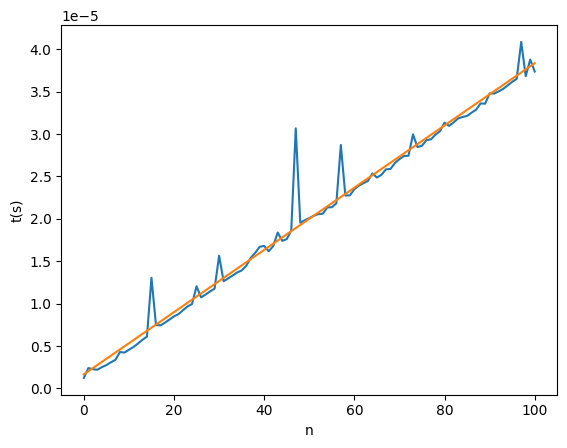

In [126]:
# Plot collected Data
plt.plot(ns, times)

#Draw Regression line
coeff = np.polyfit(ns, times, deg=1)
p = np.poly1d(coeff, variable = "n")
y = p(ns)
plt.plot(ns,y)

print("equation of line : t =", p)

plt.ylabel("t(s)")
plt.xlabel("n")
plt.show()

Thus we can see that the relationship between N and the time for the function to run is linear, and thus the time complexity is $O(n)$

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [105]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [106]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [111]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 13)
times = []

for n in N:
    temp = []
    
    for i in range(0,5):
        t = %timeit -q -n4 -r1 -o np.random.rand(n, n)
        
        temp.append(t.best)
    
    times.append(np.average(temp))

Plot result:

equation of line : t = 
             3             2
-2.469e-14 n + 1.212e-08 n + 3.73e-06 n - 0.0002984


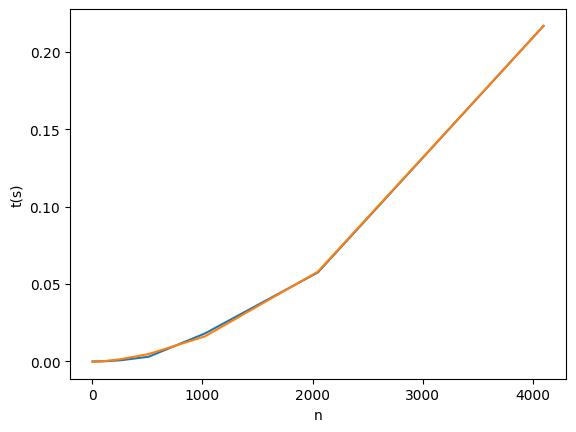

In [113]:
#Generate Regression line
coeff = np.polyfit(N, times, deg =3)
p = np.poly1d(coeff, variable = "n")
y = p(N)


# Plot graphs
plt.plot(N, times)
plt.plot(N,y)

print("equation of line : t = \n", p)

plt.ylabel("t(s)")
plt.xlabel("n")
plt.show()

We can see that a cubic regression line fits the data collected implying that calculting the determinant of an nxn matrix is $O(n^3)$.

This makes sense as calculting the determinant of a 2x2 matrix involves 2 multplications and 1 addition, thus resulting in 3 operations. Thus the time complexity would be $O(n^3)$